# importações

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Trabalhando na base de dados

In [25]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [27]:
df = pd.read_csv("/content/drive/MyDrive/scikit-learn machine_learning_python/dados/diabetes.csv")

In [28]:
display(df)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,Pedigree,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Pregnancies    768 non-null    int64  
 1   Glucose        768 non-null    int64  
 2   BloodPressure  768 non-null    int64  
 3   SkinThickness  768 non-null    int64  
 4   Insulin        768 non-null    int64  
 5   BMI            768 non-null    float64
 6   Pedigree       768 non-null    float64
 7   Age            768 non-null    int64  
 8   Outcome        768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [30]:
df[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','Pedigree','Age']] = df[['Pregnancies',	'Glucose',	'BloodPressure',
                                                                                                     'SkinThickness',	'Insulin',	'BMI',	'Pedigree',	'Age']].replace(0, np.NaN)

In [31]:
df.isnull().sum()

Pregnancies      111
Glucose            5
BloodPressure     35
SkinThickness    227
Insulin          374
BMI               11
Pedigree           0
Age                0
Outcome            0
dtype: int64

In [32]:
df = df.ffill()
df = df.dropna()
df.isnull().sum()

Pregnancies      0
Glucose          0
BloodPressure    0
SkinThickness    0
Insulin          0
BMI              0
Pedigree         0
Age              0
Outcome          0
dtype: int64

In [33]:
X = df.drop('Outcome', axis= 1)
Y = df.Outcome

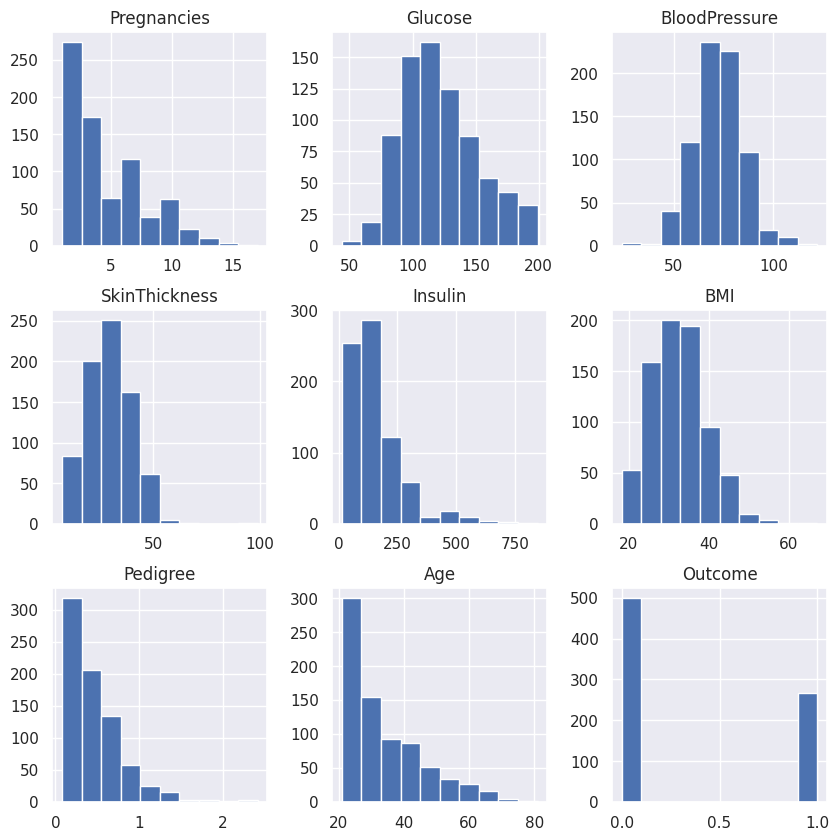

In [34]:
hist = df.hist(figsize = (10,10))

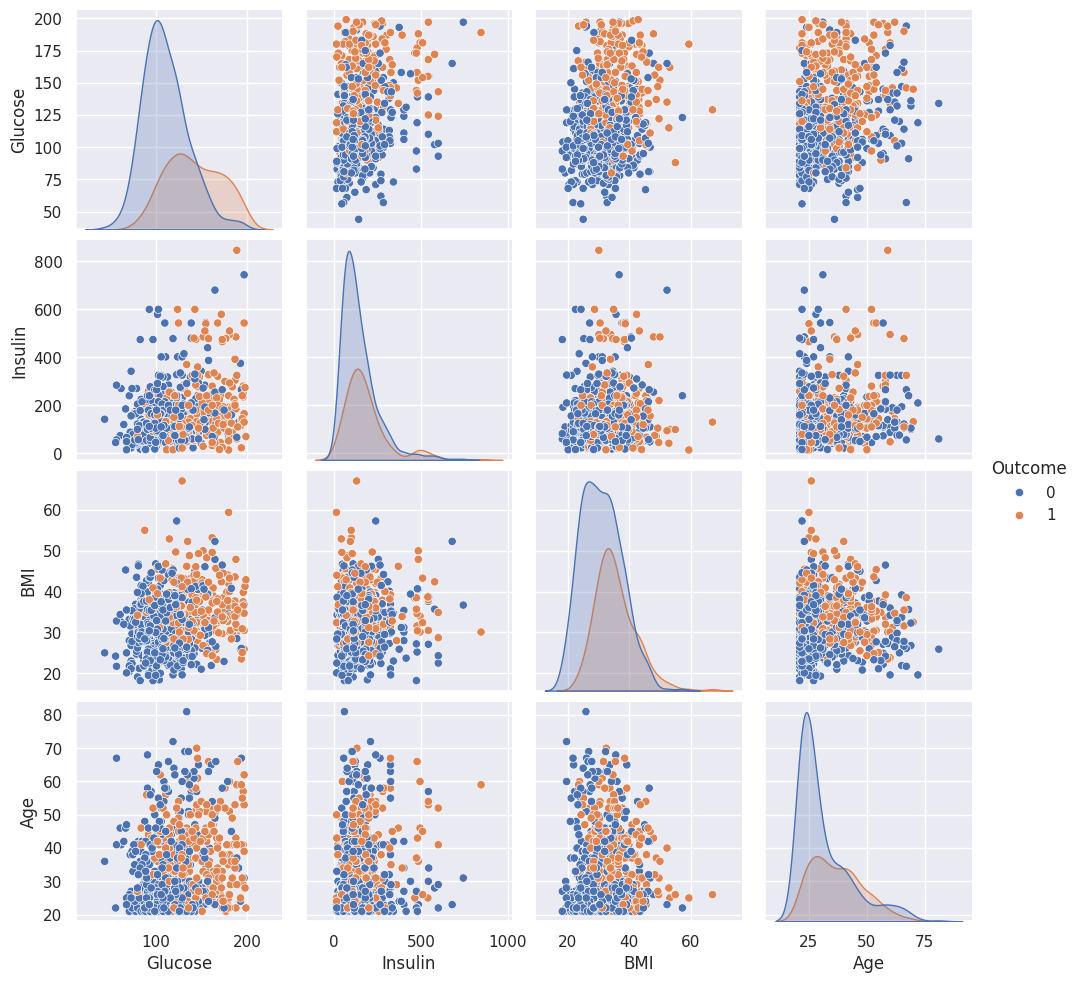

In [35]:
graph = ['Glucose','Insulin','BMI','Age','Outcome']
sns.set()
display(sns.pairplot(df[graph],hue='Outcome', diag_kind='kde'))

# Treinando e Visualizando a Precisão

In [36]:
normalizador = MinMaxScaler()
X_norm = normalizador.fit_transform(X)
X_norm

array([[0.        , 0.29032258, 0.42857143, ..., 0.20245399, 0.03800171,
        0.        ],
       [0.        , 0.6       , 0.16326531, ..., 0.50920245, 0.94363792,
        0.2       ],
       [0.25      , 0.46451613, 0.51020408, ..., 0.15132924, 0.05251921,
        0.15      ],
       ...,
       [0.25      , 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.        , 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.        , 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

In [37]:
X_train, X_test, Y_train, Y_test = train_test_split(X_norm, Y, test_size= 0.30, random_state=42)

In [38]:
KNN = KNeighborsClassifier(n_neighbors= 8)
KNN.fit(X_train, Y_train)

KNeighborsClassifier(n_neighbors=8)

In [39]:
Y_pred = KNN.predict(X_test)
Y_pred

array([1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0])

In [40]:
print(confusion_matrix(Y_pred, Y_test))

[[136  31]
 [ 19  44]]


In [41]:
accuracy_score(Y_pred, Y_test)

0.782608695652174

In [42]:
print(classification_report(Y_pred, Y_test))

              precision    recall  f1-score   support

           0       0.88      0.81      0.84       167
           1       0.59      0.70      0.64        63

    accuracy                           0.78       230
   macro avg       0.73      0.76      0.74       230
weighted avg       0.80      0.78      0.79       230

